- Chargement des donnees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("winequalityN.csv")
df = dataset.copy()
df.shape

(6497, 13)

In [77]:
# Supprimer les colonnes doubles
df.drop_duplicates(inplace=True)
df.shape

(5329, 13)

### A-Elimination des Nan : dropna ()

In [4]:
df = df.dropna()

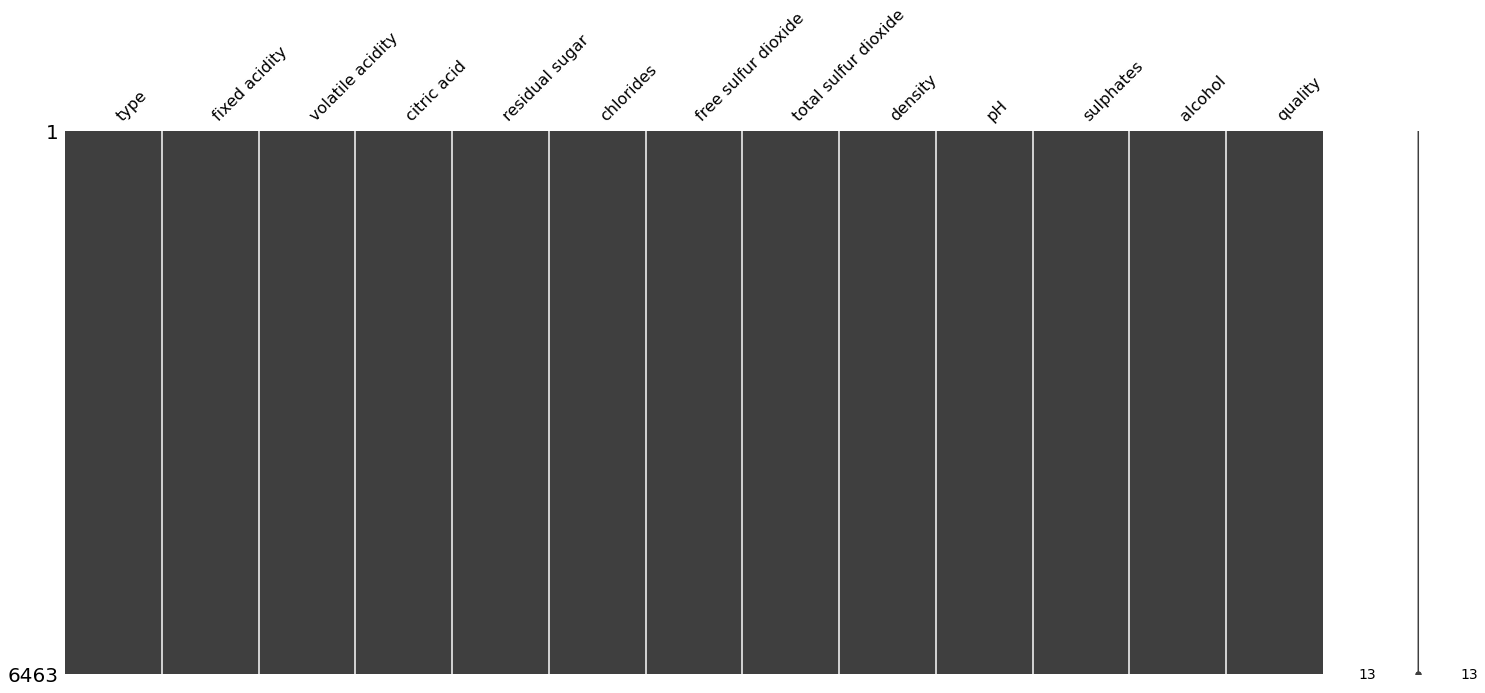

In [5]:
import missingno as msno
msno.matrix(df);

In [6]:
df.shape

(6463, 13)

### B -Encodage

#### - Transformation de la colonne `type` et `quality`

In [7]:
df['type'] = df['type'].replace(['white','red'], [1,0])

In [8]:
def niv_qualite(qualite):
    '''Cette fonction a pour but de classer les vins, suivant les trois niveaux de qualite'''
    if (qualite <=4):
        return "Faible"
    elif (qualite>4) & (qualite<=7):
        return "Moyen"
    elif (qualite>7) and (qualite<=10):
        return "Excellent"

#### A present, je vais utliser la fonction map() pour appliquer cette fonction a la variable `quality`.

In [9]:
df['quality']=df['quality'].map(niv_qualite)

In [10]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Moyen
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Moyen
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Moyen
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Moyen
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Moyen


* Maintenant pour faire des calculs, il faut necessairement des donnees numeriques. Alors nous allons codifier nos trois niveau de qualite par ordre numerique.
1 ==> Faible
2 ==> Moyen
3 ==> Excellent

In [11]:
df['quality'] = df['quality'].replace(['Faible','Moyen','Excellent'], [1,2,3])
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


### C - Création du Train set / Test set

##### Diviser le dataset

In [12]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

#### Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### D -Normalisons les donnees

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Baseline du modele

In [15]:
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier()
baseline_model.fit(X_train, y_train)
baseline_model.score(X_test, y_test) # accuracy

0.8824257425742574

# E -Entrainement de modeles

In [16]:
# Construction du modele
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


classifier = [
    KNeighborsClassifier(),
    LogisticRegression(
         multi_class='multinomial',
        random_state=28
    ),
    SVC(
        random_state=28, 
        probability=True
    ),
    DecisionTreeClassifier(
        random_state=28, 
        max_depth=4
    ),
    RandomForestClassifier(
        n_estimators=10,
        random_state=28, 
        max_depth=4, 
        class_weight='balanced'
    )
]
models = []
for classifier in classifier:
    classifier.fit(X_train, y_train)
    print(f"{classifier.__class__.__name__:22}: Entraine")
    models.append(classifier)

KNeighborsClassifier  : Entraine
LogisticRegression    : Entraine
SVC                   : Entraine
DecisionTreeClassifier: Entraine
RandomForestClassifier: Entraine


### F -Evaluation des differentes modeles

## Calcul du Accuracy
* Accuracy : C'est le nombre de prediction correct sur le nombre d'observation total
* Formule :  TP + TN / (TP + FP + TN + FN)

In [17]:
from sklearn.metrics import accuracy_score

for model in models:
    y_pred = model.predict(X_test)
    print(
    f"{model.__class__.__name__:22}: Accuracy = {accuracy_score(y_test, y_pred)} \n"
    )

KNeighborsClassifier  : Accuracy = 0.9399752475247525 

LogisticRegression    : Accuracy = 0.9455445544554455 

SVC                   : Accuracy = 0.9449257425742574 

DecisionTreeClassifier: Accuracy = 0.9436881188118812 

RandomForestClassifier: Accuracy = 0.5556930693069307 



### Rapport de classification

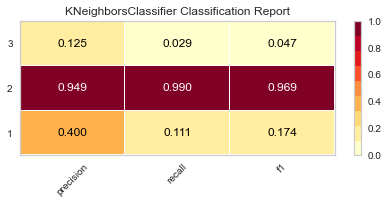

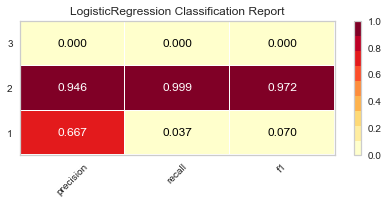

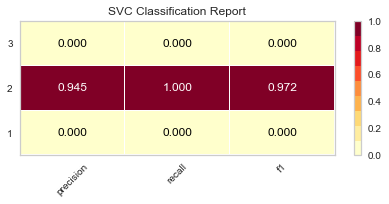

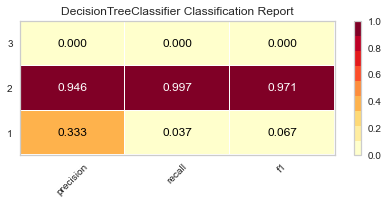

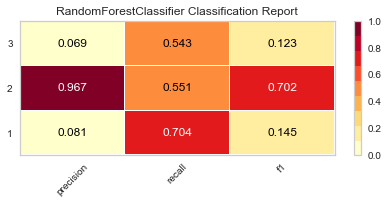

In [23]:
mapping = {1: "Faible", 2: "Moyen", 3:"Excellent"}
import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    ClassificationReport,
)

for model in models:
    fig, ax = plt.subplots(figsize=(6, 3))
    cm_viz = ClassificationReport(
        model,
        label_encoder=mapping
    )
    cm_viz.score(X_test, y_test)
    cm_viz.poof()

En se basant le Recall, nous pouvons retenir que KNeighborsClassifier constitut un meilleur model pour ce dataset.

### Optimisation de model

In [29]:
from sklearn.model_selection import GridSearchCV
knn_cls = KNeighborsClassifier()
params = {
    "n_neighbors": [4,5,6],
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": [25,30,35],
    "p":[1,2,3],
    }
cv = GridSearchCV(
    knn_cls, 
    params, 
    n_jobs=-1
).fit(X_train, y_train)
print(cv.best_params_)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'p': 3, 'weights': 'distance'}


#### Modelisation avec les best params:

In [30]:
knn_cls_best = KNeighborsClassifier(**cv.best_params_)
knn_cls_best.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=25, p=3, weights='distance')

In [31]:
knn_cls_best.score(X_train, y_train)

1.0

In [32]:
knn_cls_best.score(X_test, y_test)

0.9517326732673267